In [29]:
#Anemia Deficiencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [52]:
health=pd.read_csv("/home/jovyan/EEP153_Materials/Project4/health_of_each_household.csv")
target_nutrients=pd.read_csv("/home/jovyan/EEP153_Materials/Project4/target_nutrients.csv")
households2=pd.read_csv("/home/jovyan/EEP153_Materials/Project4/households2.csv")
bean_nutrition=pd.read_csv("/home/jovyan/EEP153_Materials/Project4/bean_nutrition_official.csv")
consumption=pd.read_csv("/home/jovyan/EEP153_Materials/Project4/consumption_final.csv")

In [80]:

#grabs nutrients related to anemia deficencies 
#Protein->Folate->Iron->Calories
healthlist=[1, 3, 6, 0]
target_list=[35, 24, 5, 32]


anemia=health.iloc[healthlist]
anemia_goals=target_nutrients.iloc[target_list]


#save IDs for later
IDs=anemia.columns[1:]

#resets axes to regular indexes
anemia=anemia.reset_index(drop=True).drop(anemia.columns[0], axis=1)
anemia_goals=anemia_goals.reset_index(drop=True).drop(anemia_goals.columns[0], axis=1)
anemia.columns=range(anemia.shape[1])

#code to create a database that divides nutritional recommended per household over actual nutrients received
#multiply goals by 7, its still per day dummy
column_names=range(6712)
anemia_fulfillment=pd.DataFrame(columns = column_names)
for i in range(len(anemia.columns)):
    discrepancy_vector=[]
    for t in range(4):
        discrepancy=anemia.iloc[t, i]/(anemia_goals.iloc[t, i]*7)
        if discrepancy > 1:
            discrepancy = 1
        discrepancy_vector.append(discrepancy)
    anemia_fulfillment[i]=discrepancy_vector


anemia_fulfillment=anemia_fulfillment.T


#average composite anemia health
average_nutrition=[]

for i in range(6712):
    average=np.mean(anemia_fulfillment.loc[i])
    average_nutrition.append(average)

#returns column of size of household    
households3=households2.drop("ID", axis=1)
number_in_house=[]
for i in range(6712):
    number=sum(households3.loc[i])
    number_in_house.append(number)

#shows difference instead of percetange fulfilled used for policy outcomes
differences=[]
for i in range(len(anemia.loc[0])):
    diffs=anemia.loc[0][i]-anemia_goals.loc[0][i]
    if diff<0:
        diff=0
    difference.append(diff)

difference=[]
for i in range(len(anemia.loc[0])):
    diffs=anemia.loc[2][i]-anemia_goals.loc[2][i]
    if diff<0:
        diff=0
    difference.append(diff)


    #constructs database with difference metrics
anemia_fulfillment["Average Nutrition"]=average_nutrition
anemia_fulfillment["Household amount"]=number_in_house
anemia_fulfillment["Iron difference"]=difference
anemia_fulfillment["Protein difference"]=differences
anemia_fulfillment["j"]=consumption["j"]
anemia_fulfillment["t"]=consumption["t"]
anemia_fulfillment=anemia_fulfillment.rename(columns={0:"Protein", 1:"Folate", 2:"Iron", 3:"Calories"})



/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


ValueError: Length of values does not match length of index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f093e6d70f0>]],
      dtype=object)

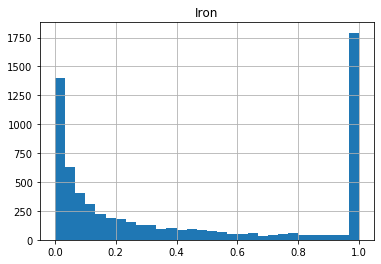

In [76]:
anemia_fulfillment.hist(column="Iron", bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09369e68d0>]],
      dtype=object)

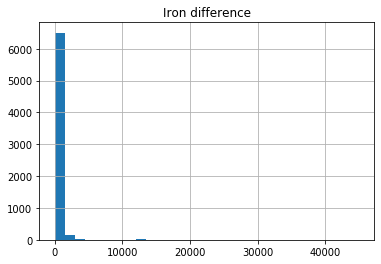

In [77]:
anemia_fulfillment.hist(column="Iron difference", bins=30)

In [74]:
#Used to get statistics
anemia_fulfilled=anemia_fulfillment[(anemia_fulfillment["Iron difference"]==0)]
total_residents_fulfilled=sum(anemia_fulfilled["Household amount"])
anemia_necessary=anemia_fulfillment[(anemia_fulfillment["Iron difference"]!=0)]
total_residents_in_need=sum(anemia_necessary["Household amount"])
total_iron_lacking=sum(anemia_necessary["Iron difference"])
protein_fulfilled=anemia_fulfillment[(anemia_fulfillment["Protein difference"]==0)]
protein_necessary=anemia_fulfillment[(anemia_fulfillment["Protein difference"]!=0)]
print(total_residents_in_need, total_iron_lacking, total_residents_fulfilled, total_iron_lacking/total_residents_in_need, len(anemia_fulfilled))


16947 2206152.234694799 14192 130.1795146453531 2808


0.41835518474374256

In [39]:
#just to count how many fall households into a percent of health

def count_range(nutrient, minimum, maximum):
    nutrients=["Protein", "Folate", "Iron", "Calories", "Average Nutrition"]
    for i in range(len(nutrients)):
        if nutrients[i]==nutrient:
            data=anemia_fulfillment[nutrient]
        #if all(nutrients[i]!=nutrient):
            #return("Check Spelling")
    counter=0
    for i in range(len(data)):
        if data[i]>=minimum and data[i]<=maximum:
            counter+=1
    return (counter, counter/6712)

In [41]:
#stats used in presentation
print(count_range("Calories", 0, .01))
print(count_range("Calories", .99, 1))
print(count_range("Calories", 0, .2))
print(count_range("Iron", 0, .01))
print(count_range("Iron", .99, 1))
print(count_range("Iron", 0, .2))
print(count_range("Average Nutrition", 0, .01))
print(count_range("Average Nutrition", .9, 1))
print(count_range("Average Nutrition", 0, .2))

(562, 0.08373063170441002)
(948, 0.14123957091775924)
(3583, 0.5338200238379023)
(844, 0.12574493444576879)
(1756, 0.26162097735399287)
(3163, 0.4712455303933254)
(685, 0.10205601907032182)
(826, 0.1230631704410012)
(3145, 0.4685637663885578)


Text(0.5, 0, 'household size')

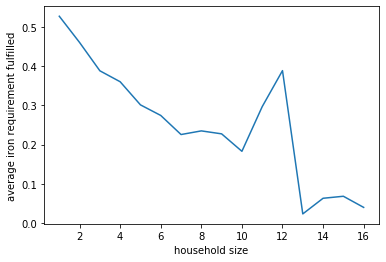

In [27]:
#Construct line graph for Iron per household

s=[]
list_of_averages=[]
for i in range(max(anemia_fulfillment["Household amount"])+1):
    if i==16:
        break
    else:
        based_off_number=(anemia_fulfillment.where(anemia_fulfillment["Household amount"]==(i+1)))["Iron"]
        average=np.mean(based_off_number)
        list_of_averages.append(average)
        s.append(i)
    


b=[float(s+1) for s in s]
line_chart1=pd.DataFrame()
line_chart1["x"]=b
line_chart1["y"]=list_of_averages

plt.plot([1, 2, 3, 4 , 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], line_chart1["y"])
plt.ylabel("average iron requirement fulfilled")
plt.xlabel("household size")


In [25]:
#construct line graph for calories per household size
s=[]
list_of_averages=[]
for i in range(max(anemia_fulfillment["Household amount"])+1):
    if i==16:
        break
    else:
        based_off_number=(anemia_fulfillment.where(anemia_fulfillment["Household amount"]==(i+1)))["Calories"]
        average=np.mean(based_off_number)
        list_of_averages.append(average)
        s.append(i)
        
b=[float(s+1) for s in s]
line_chart2=pd.DataFrame()
line_chart2["x"]=b
line_chart2["y"]=list_of_averages

plt.plot([1, 2, 3, 4 , 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], line_chart2["y"])
plt.ylabel("average Calorie requirement fulfilled")
plt.xlabel("household size")

    

NameError: name 'plt' is not defined

In [7]:
#analysis over time
marker=[]
for i in anemia_fulfillment["j"]:
    if i not in marker:
        marker.append(i)

two_times_dataframe=pd.DataFrame()
first_obs=[]
second_obs=[]
time_differences=[]
average_differences=[]
household_0=[]
household_1=[]

for i in marker:
    per_household=anemia_fulfillment[anemia_fulfillment["j"]==i]
    #per_household=per_household.groupby("t", axis=1, descending=True)
    time=per_household["t"]
    averages=per_household["Average Nutrition"]
    house=per_household["Household amount"]
    if len(averages)>2:
        continue
    if len(averages)==2:
        house0=house.iloc[0]
        house1=house.iloc[1]
        first_observation=time.iloc[0]
        second_observation=time.iloc[1]
        time_diff=time.iloc[1]-time.iloc[0]
        average_diff=averages.iloc[1]-averages.iloc[0]
        time_differences.append(time_diff)
        average_differences.append(average_diff)
        first_obs.append(first_observation)
        second_obs.append(second_observation)
        household_0.append(house0)
        household_1.append(house1)
    
two_times_dataframe["Time Difference"]=time_differences
two_times_dataframe["Average Anemic Change Per Person"]=average_differences
two_times_dataframe["Time 0"]=first_observation
two_times_dataframe["Time 1"]=second_observation
two_times_dataframe["# at time 0"]=household_0
two_times_dataframe["# at time 1"]=household_1


        
    
   
    
    


KeyError: 'j'

In [32]:
#interesting to see that households generally got larger by 1 over two years
person_change=[]
for i in range(2639):
    p=two_times_dataframe["# at time 1"][i]-two_times_dataframe["# at time 0"][i]
    person_change.append(p)
np.mean(person_change)

1.1625615763546797